# Fake product detection by machine learning

### Import Keras and tensorflow

In [1]:
#pip install keras
#pip install tensorflow

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

### Dataset import with image generator function

In [2]:
# import dataset using the generator function
n_batch = 128
trainset_datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

testset_datagenerator = ImageDataGenerator(rescale = 1./255)

training_image_set = trainset_datagenerator.flow_from_directory('product/training',
                                                 target_size=(128,128),
                                                 batch_size =n_batch,
                                                 class_mode = 'binary')

testing_image_set = testset_datagenerator.flow_from_directory('product/test',
                                            target_size=(128,128),
                                            batch_size =n_batch,
                                            class_mode = 'binary')

Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [3]:
train_labels = training_image_set.labels
print(train_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [4]:
x = training_image_set
print(x)

### Plot between instance and class

Text(0.5, 1.0, 'View Plot between instance and class')

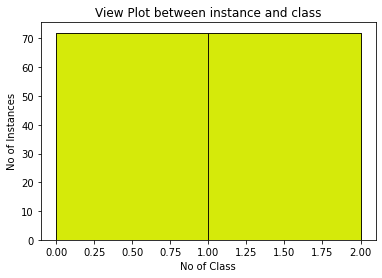

In [5]:
# Plot the chart between the number of instances and the no of class
p1 = plt.hist(training_image_set.classes, bins=range(0,3), alpha=0.8, color='green', edgecolor='black')
p2 = plt.hist(testing_image_set.classes,  bins=range(0,3), alpha=0.8, color='yellow', edgecolor='black')
plt.ylabel('No of Instances')
plt.xlabel('No of Class')
plt.title('View Plot between instance and class')

### Verify the data

(128, 128, 128, 3) (128,)


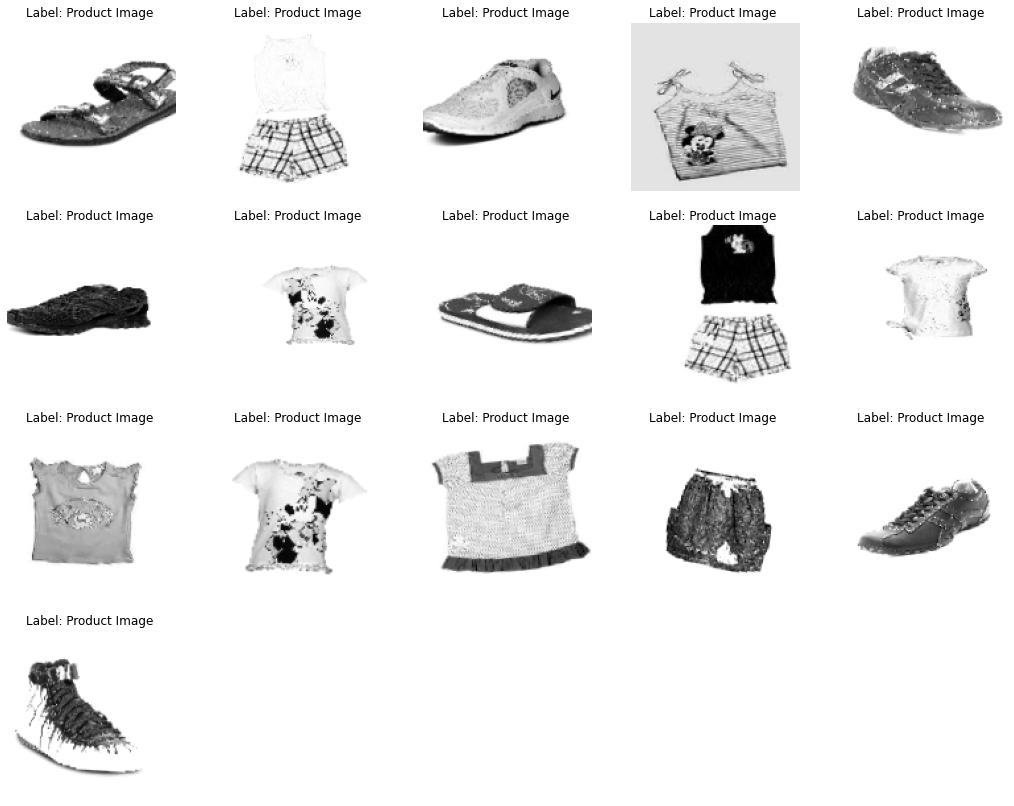

In [6]:
# To verify that the dataset looks correct, let's plot the few images from the training set and display the class name below each image:
for P, q in training_image_set:
    print(P.shape, q.shape)
    plt.figure(figsize=(18,18))
    for K in range(16):
        plt.subplot(5,5,K+1)
        plt.axis('off')
        plt.title('Label: Product Image ')
        product_image = np.uint8(255*P[K,:,:,0])
        plt.imshow(product_image, cmap='gray')
    break

## CNN Architectutres 

In [7]:
def history_model_fit(model):

    history = model.fit(training_image_set, epochs=4, 
                    validation_data=(training_image_set))

    
    return history

def loss_chart(history):
    plt.figure(0)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.title('Training - Loss Function')
    
def accuracy_chart(history):
    plt.figure(1)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(loc = 'upper right')
    plt.title('Train - Accuracy')
    
def accuracy_output(model):
      
    test_loss, test_acc = model.evaluate(testing_image_set, verbose=2)
    return test_acc


code below define the convolutional base using a common pattern

### 1)  LeNet-5 Complete Architecture

In [8]:
# The lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

# Add Dense layers on top
model1.add(Flatten())
model1.add(Dense(activation="relu", units=256))
model1.add(Dense(activation="sigmoid", units=1))

In [9]:
# Checking model summary and the complete architecture of your model:

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

### Compile  and train the model

Metrics
This for log, we choose accuracy .

In [10]:
# here, the created sequential model has been compiled to calculate the loss as well as accuracy
model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
# Train the model process has been start here to evaluate that the created model can be used further in real time within the application.
train_model = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='/content/drive/MyDrive/product/model.h5', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [12]:
training_labels = training_image_set.class_indices
#testing_labels = testing_image_set.class_indices
print(training_labels)

{'fake': 0, 'real': 1}


In [13]:
# hist = model.fit(
#         training_image_set,
#         steps_per_epoch=80,
#         epochs=80,
#         validation_data=testing_image_set,
#         validation_steps=28,
#         callbacks = train_model
#     )

In [14]:
history1 = history_model_fit(model1)

Epoch 1/4
2/2 [==============================] - 34s 18s/step - loss: 1.1184 - accuracy: 0.5208 - val_loss: 0.8104 - val_accuracy: 0.5000
Epoch 2/4
2/2 [==============================] - 22s 20s/step - loss: 0.8217 - accuracy: 0.5000 - val_loss: 0.7238 - val_accuracy: 0.5000
Epoch 3/4
2/2 [==============================] - 20s 9s/step - loss: 0.7143 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 4/4
2/2 [==============================] - 20s 9s/step - loss: 0.6942 - accuracy: 0.5000 - val_loss: 0.7025 - val_accuracy: 0.5000


### Evaluate the model

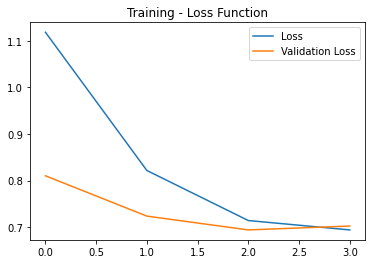

In [15]:
# Plot the figure for loss and the validation loss
loss_chart(history1)

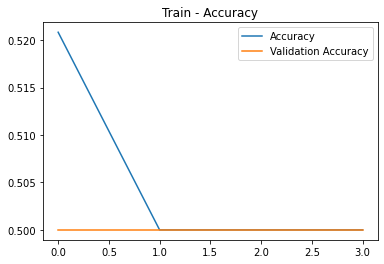

In [16]:
# plot the figure for accuracy and validation accuracy
accuracy_chart(history1)

In [17]:
# Display the accuracy obtained
test_acc = accuracy_output(model1)
print(test_acc)


2/2 - 8s - loss: 0.7040 - accuracy: 0.5000 - 8s/epoch - 4s/step
0.5


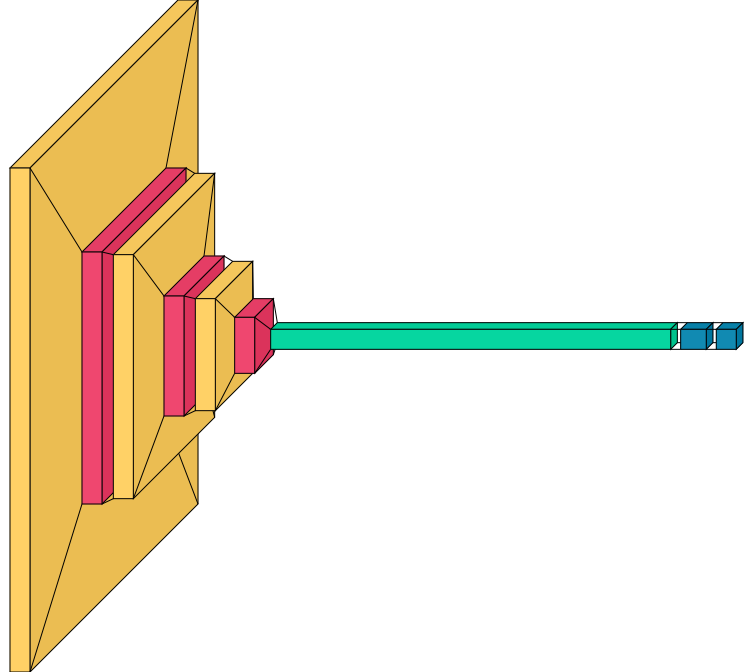

In [18]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model1)

### 2) VGGNET Architecture


In [19]:
# VGGNET Architecture

from keras import layers
from keras.models import Model, Sequential

from functools import partial

conv3 = partial(layers.Conv2D,
                kernel_size=3,
                strides=1,
                padding='same',
                activation='relu')

def block(in_tensor, filters, n_convs):
    conv_block = in_tensor
    for _ in range(n_convs):
        conv_block = conv3(filters=filters)(conv_block)
    return conv_block

def _vgg(in_shape=(227,227,3),
         n_classes=10,
         opt='sgd',
         n_stages_per_blocks=[2, 2, 3, 3, 3]):
    in_layer = layers.Input(in_shape)

    block1 = block(in_layer, 64, n_stages_per_blocks[0])
    pool1 = layers.MaxPool2D()(block1)
    block2 = block(pool1, 128, n_stages_per_blocks[1])
    pool2 = layers.MaxPool2D()(block2)
    block3 = block(pool2, 256, n_stages_per_blocks[2])
    pool3 = layers.MaxPool2D()(block3)
    block4 = block(pool3, 512, n_stages_per_blocks[3])
    pool4 = layers.MaxPool2D()(block4)
    block5 = block(pool4, 512, n_stages_per_blocks[4])
    pool5 = layers.MaxPool2D()(block5)
    flattened = layers.GlobalAvgPool2D()(pool5)

    dense1 = layers.Dense(4096, activation='relu')(flattened)
    dense2 = layers.Dense(4096, activation='relu')(dense1)
    preds = layers.Dense(1000, activation='sigmoid')(dense2)

    model2 = Model(in_layer, preds)
    model2.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
    return model2

def vgg16(in_shape=(227,227,3), n_classes=10, opt='sgd'):
    return _vgg(in_shape, n_classes, opt)

def vgg19(in_shape=(227,227,3), n_classes=10, opt='sgd'):
    return _vgg(in_shape, n_classes, opt, [2, 2, 4, 4, 4])

if __name__ == '__main__':
    model2 = vgg19()
    print(model2.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv2d_3 (Conv2D)           (None, 227, 227, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 227, 227, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 113, 113, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 113, 113, 128)     73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 113, 113, 128)     147584    
                                                             

In [20]:
# Train model
train_model = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='/content/drive/MyDrive/product/model2.h5', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [21]:
history2 = history_model_fit(model2)

Epoch 1/4
2/2 [==============================] - 152s 136s/step - loss: 6.4458 - accuracy: 0.4375 - val_loss: 296.9620 - val_accuracy: 0.5000
Epoch 2/4
2/2 [==============================] - 141s 45s/step - loss: 255.6892 - accuracy: 0.5278 - val_loss: 6.5716 - val_accuracy: 0.5000
Epoch 3/4
2/2 [==============================] - 157s 144s/step - loss: 6.5155 - accuracy: 0.5000 - val_loss: 6.3385 - val_accuracy: 0.5000
Epoch 4/4
2/2 [==============================] - 143s 130s/step - loss: 6.0667 - accuracy: 0.5000 - val_loss: 5.4607 - val_accuracy: 0.5000


#### Evaluate the Model

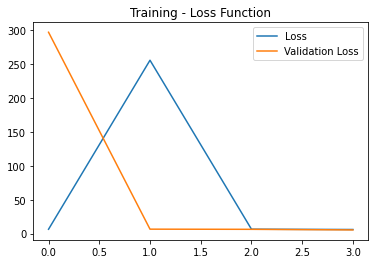

In [22]:
# Plot the figure for loss and the validation loss
loss_chart(history2)

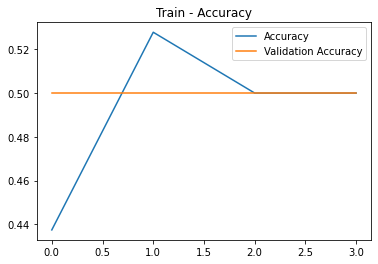

In [23]:
# plot the figure for accuracy and validation accuracy
accuracy_chart(history2)

In [24]:
# Display the accuracy obtained
test_acc = accuracy_output(model2)
print(test_acc)

2/2 - 32s - loss: 5.4607 - accuracy: 0.5000 - 32s/epoch - 16s/step
0.5


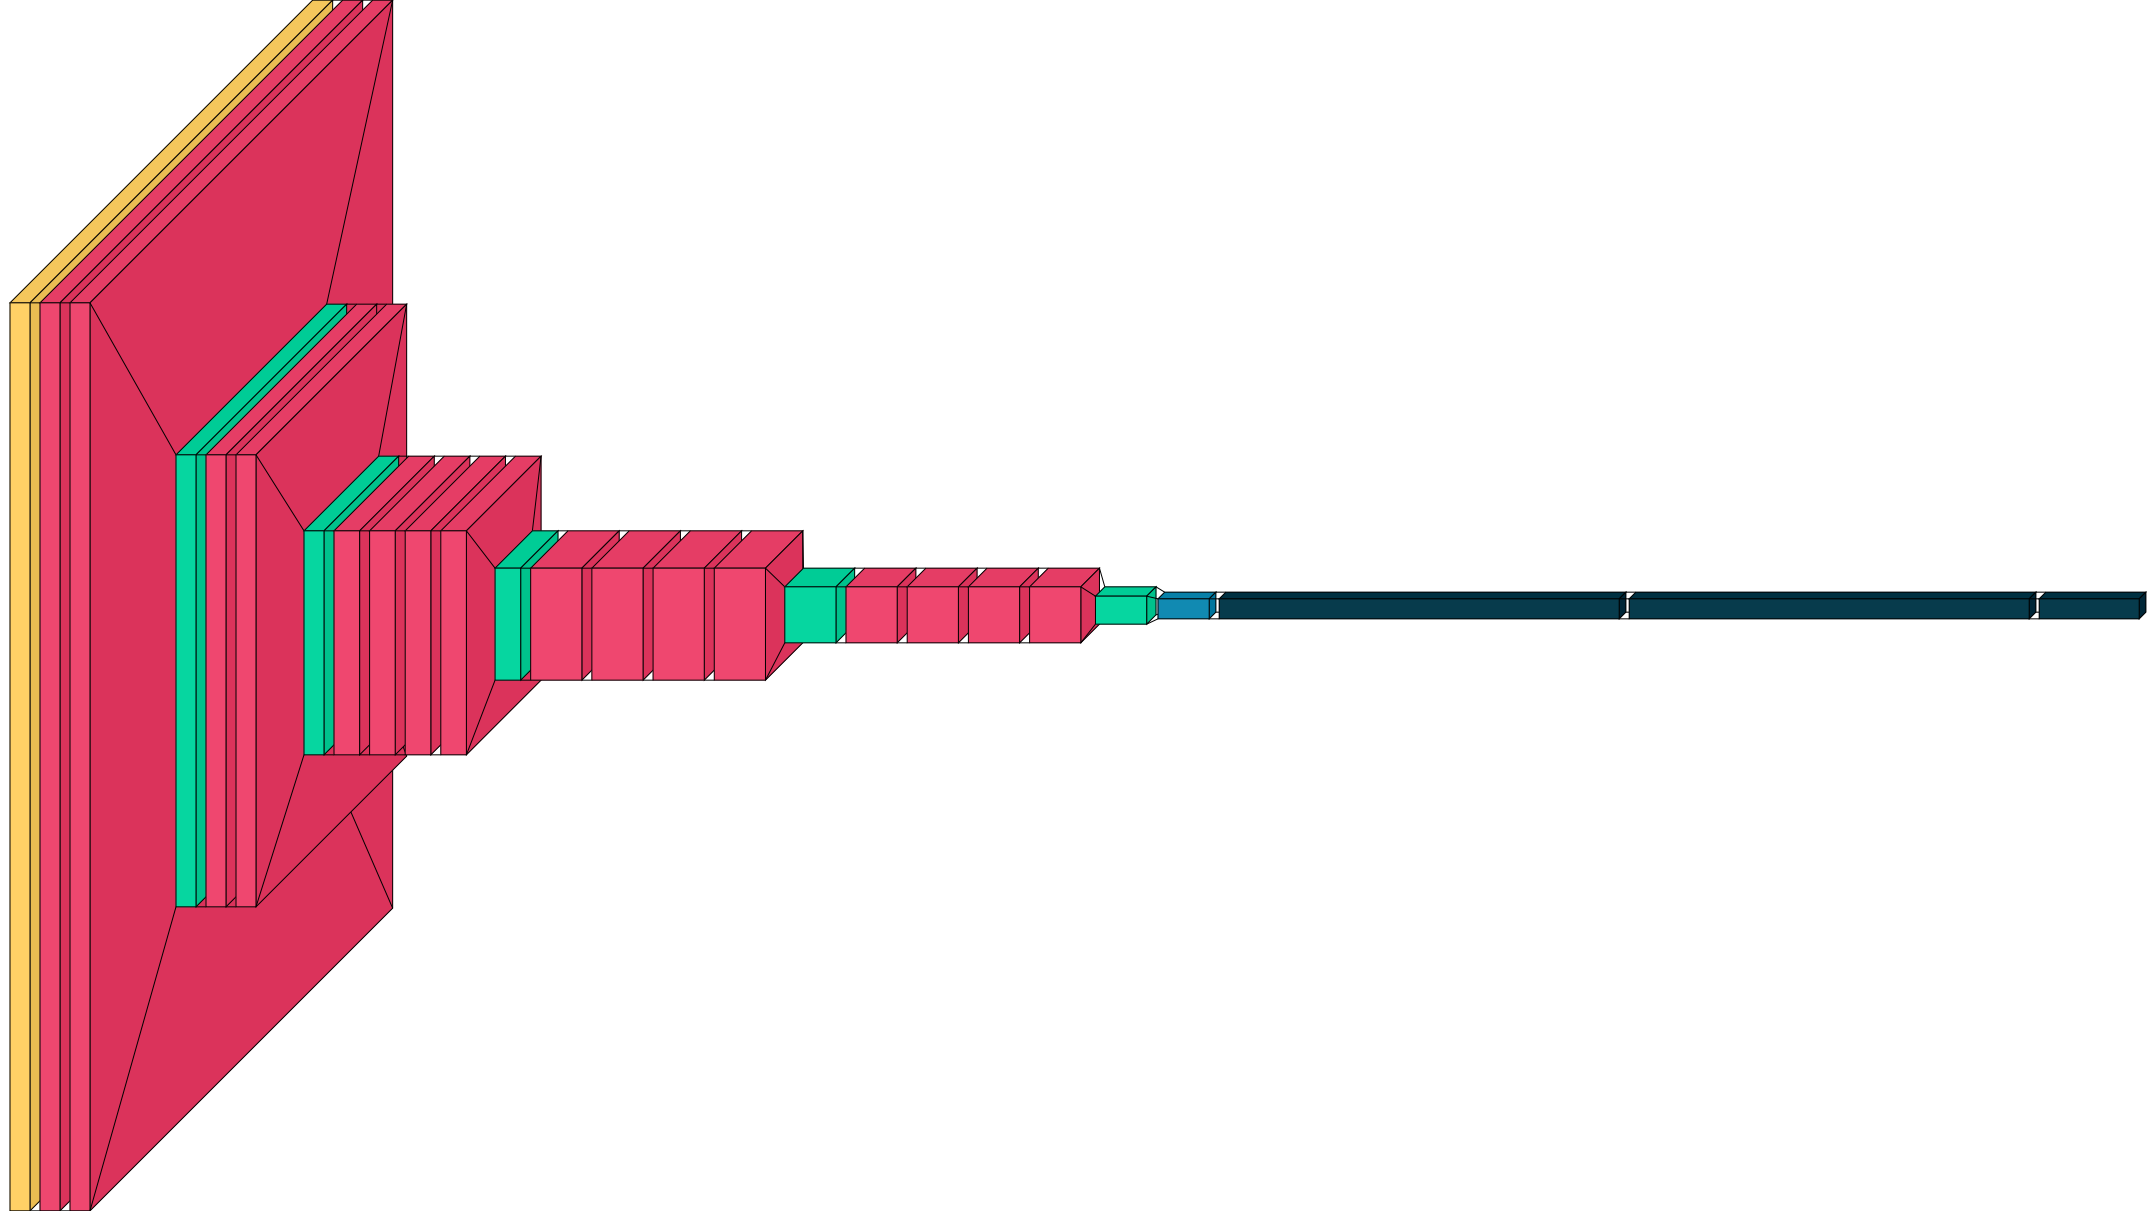

In [25]:

import visualkeras
visualkeras.layered_view(model2)

### AlexNet Architecture

In [26]:
# AlexNet CNN Architecture
from keras import layers
from keras.models import Model

def alexnet(in_shape=(128,128,3), n_classes=1000, opt='sgd'):
    in_layer = layers.Input(in_shape)
    conv1 = layers.Conv2D(96, 11, strides=4, activation='relu')(in_layer)
    pool1 = layers.MaxPool2D(3, 2)(conv1)
    conv2 = layers.Conv2D(256, 5, strides=1, padding='same', activation='relu')(pool1)
    pool2 = layers.MaxPool2D(3, 2)(conv2)
    conv3 = layers.Conv2D(384, 3, strides=1, padding='same', activation='relu')(pool2)
    conv4 = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(conv3)
    pool3 = layers.MaxPool2D(3, 2)(conv4)
    flattened = layers.Flatten()(pool3)
    dense1 = layers.Dense(4096, activation='relu')(flattened)
    drop1 = layers.Dropout(0.5)(dense1)
    dense2 = layers.Dense(4096, activation='relu')(drop1)
    drop2 = layers.Dropout(0.5)(dense2)
    preds = layers.Dense(1000, activation='sigmoid')(drop2)
    

    model3 = Model(in_layer, preds)
    model3.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    return model3

if __name__ == '__main__':
    model3 = alexnet()
    print(model3.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_19 (Conv2D)          (None, 30, 30, 96)        34944     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 96)       0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 256)       614656    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 6, 6, 384)         8851

In [27]:
# Train model
train_model = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='/content/drive/MyDrive/product/model3.h5', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [28]:
history3 = history_model_fit(model3)

Epoch 1/4
2/2 [==============================] - 28s 16s/step - loss: 6.2490 - accuracy: 0.0486 - val_loss: 5.1207 - val_accuracy: 0.5000
Epoch 2/4
2/2 [==============================] - 20s 9s/step - loss: 4.9000 - accuracy: 0.5000 - val_loss: 5.4779 - val_accuracy: 0.5000
Epoch 3/4
2/2 [==============================] - 21s 19s/step - loss: 2.7426 - accuracy: 0.5000 - val_loss: 3.9726 - val_accuracy: 0.5000
Epoch 4/4
2/2 [==============================] - 23s 21s/step - loss: 1.2431 - accuracy: 0.5347 - val_loss: 2.7546 - val_accuracy: 0.5000


##Evaluate the Model

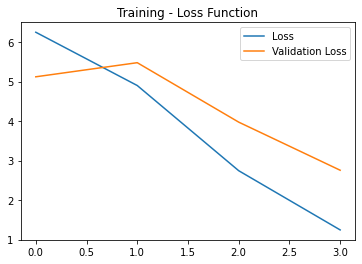

In [29]:
# Plot the figure for loss and the validation loss
loss_chart(history3)

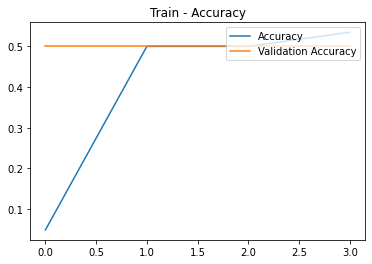

In [30]:
# plot the figure for accuracy and validation accuracy
accuracy_chart(history3)

In [31]:
# Display the accuracy obtained
test_acc = accuracy_output(model3)
print(test_acc)

2/2 - 8s - loss: 2.7597 - accuracy: 0.5000 - 8s/epoch - 4s/step
0.5


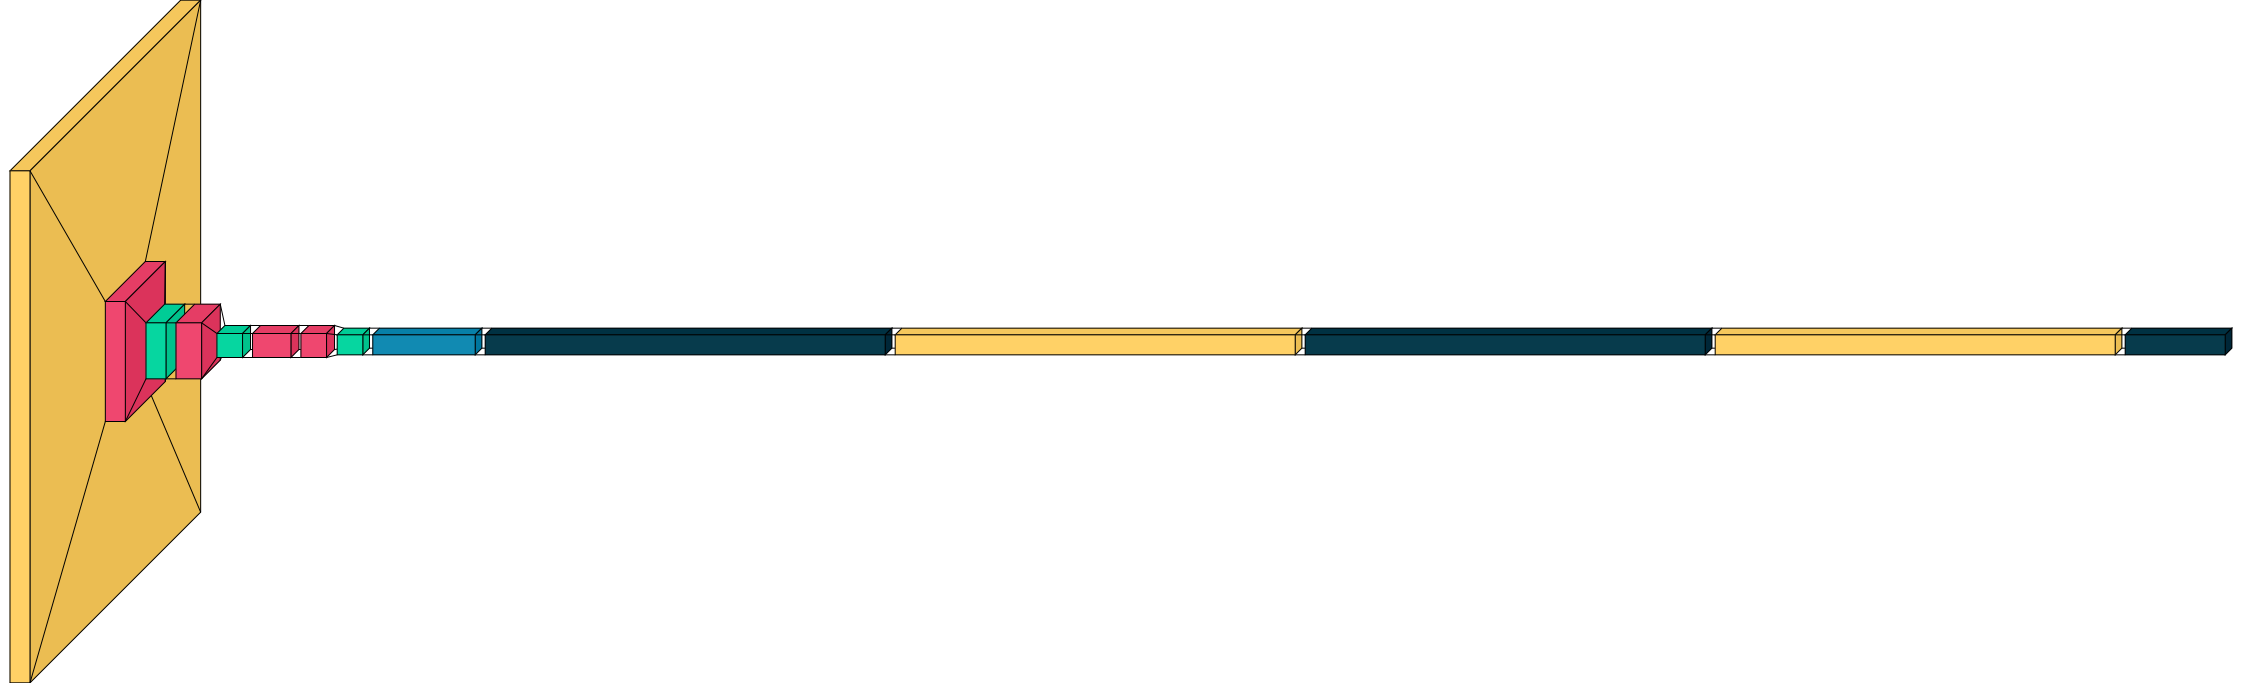

In [32]:
import visualkeras
visualkeras.layered_view(model3)

In [33]:
# Comparison of the CNN architectures
ac1 = accuracy_output(model1)
ac2 = accuracy_output(model2)
ac3 = accuracy_output(model3)

print("LeNet architecture accuracy:", ac1)
print("VggNet architecture accuracy:", ac2)
print("AlexNet architecture accuracy:", ac3)



2/2 - 8s - loss: 0.7040 - accuracy: 0.5000 - 8s/epoch - 4s/step
2/2 - 33s - loss: 5.4607 - accuracy: 0.5000 - 33s/epoch - 16s/step
2/2 - 8s - loss: 2.7597 - accuracy: 0.5000 - 8s/epoch - 4s/step
LeNet architecture accuracy: 0.5
VggNet architecture accuracy: 0.5
AlexNet architecture accuracy: 0.5


## Prediction process completed and ready to detect fake or real image

In [34]:
from keras.utils import image_utils

In [44]:
def product_image_Prediction(loc):
    testing_product_image = image_utils.load_img(loc, target_size = (128,128))
    plt.axis('off')
    plt.imshow(testing_product_image)
    testing_product_image = image_utils.img_to_array(testing_product_image)
    testing_product_image = np.expand_dims(testing_product_image, axis =0)
    outcome = model1.predict(testing_product_image)
    if outcome[0][0] == 1:
        predictions = 'This Product is Real'
    else:
        predictions = 'This Product is Fake'
    print('Prediction Result: ',predictions)

Please enter product image path to check weather it is real or fake: product/test/real/5469.jpg
1/1 [==============================] - 0s 31ms/step
Prediction Result:  This Product is Real


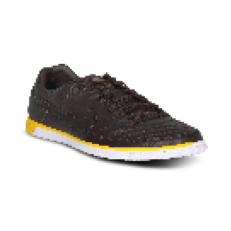

In [48]:
product_image_path = input("Please enter product image path to check weather it is real or fake: ")
test_image_1 = product_image_Prediction(product_image_path)
# product/test/fake/2732.jpg
# product/test/real/5469.jpg

Please enter product image path to check weather it is real or fake: product/test/fake/2742.jpg
1/1 [==============================] - 0s 31ms/step
Prediction Result:  This Product is Real


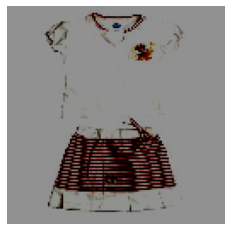

In [41]:
product_image_path = input("Please enter product image path to check weather it is real or fake: ")
test_image_2 = product_image_Prediction(product_image_path)
# product/test/fake/2742.jpg

In [ ]:
product_image_path = input("Please enter product image path to check weather it is real or fake: ")
test_image_3 = product_image_Prediction(product_image_path)
# product/test/fake/5459.jpg